In [ ]:
# Importing necessary libraries
import pandas as pd

# Load the datasets
file_path_1 = '/content/sample_data/apps.csv'  # Replace with the actual path
file_path_2 = '/content/sample_data/user_reviews.csv'  # Replace with the actual path

# Loading both datasets
data1 = pd.read_csv(file_path_1)
data2 = pd.read_csv(file_path_2)

# Displaying first few rows of each dataset
print("Dataset 1 Head:")
display(data1.head())

print("Dataset 2 Head:")
display(data2.head())

# Checking for missing values and data types in both datasets
print("\nDataset 1 Info:")
data1.info()

print("\nDataset 2 Info:")
data2.info()

print("\nMissing Values in Dataset 1:")
print(data1.isnull().sum())

print("\nMissing Values in Dataset 2:")
print(data2.isnull().sum())


Dataset 1 Head:


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Dataset 2 Head:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000



Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB

Dataset 2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17155 entries, 0 to 17154


In [ ]:
# Drop the 'Unnamed: 0' column from Dataset 1 as it is not needed
data1.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Handling missing values in Dataset 1
# For 'Rating', we can fill missing values with the mean rating
data1['Rating'].fillna(data1['Rating'].mean())

,Rating
0,4.100000
1,3.900000
2,4.700000
3,4.500000
4,4.300000
...,...
9654,4.500000
9655,5.000000
9656,4.173243
9657,4.500000


In [ ]:
# Handling missing values in Dataset 1
# For 'Rating', we can fill missing values with the mean rating
data1['Rating'].fillna(data1['Rating'].mean())

# For 'Size', we can fill missing values with the median
data1['Size'].fillna(data1['Size'].median())

,Size
0,19.0
1,14.0
2,8.7
3,25.0
4,2.8
...,...
9654,53.0
9655,3.6
9656,9.5
9657,12.0


In [ ]:
# Dropping rows with missing 'Current Ver' and 'Android Ver' in Dataset 1 (few missing values)
data1.dropna(subset=['Current Ver', 'Android Ver'], inplace=True)

In [ ]:
# Converting 'Installs' and 'Price' columns to numerical values
data1['Installs'] = data1['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
data1['Price'] = data1['Price'].str.replace('$', '').astype(float)

In [ ]:
# Cleaning Dataset 2
# Dropping rows with missing sentiment data as they are not useful for sentiment analysis
data2.dropna(subset=['Translated_Review', 'Sentiment'], inplace=True)

In [ ]:
# Displaying cleaned data information
print("\nCleaned Dataset 1 Info:")
data1.info()

print("\nCleaned Dataset 2 Info:")
data2.info()


Cleaned Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         9649 non-null   int64  
 4   Size            8422 non-null   float64
 5   Installs        9649 non-null   int64  
 6   Type            9649 non-null   object 
 7   Price           9649 non-null   float64
 8   Content Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9649 non-null   object 
 12  Android Ver     9649 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB

Cleaned Dataset 2 Info:
<class 'pandas.core.frame.DataFrame'>
Index: 10944 entries, 0 to 17153
Data columns (total 5 columns):
 #   Col

In [ ]:
# Displaying few rows to verify the cleaning
print("\nCleaned Dataset 1 Head:")
display(data1.head())

print("\nCleaned Dataset 2 Head:")
display(data2.head())


Cleaned Dataset 1 Head:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up



Cleaned Dataset 2 Head:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


<ipython-input-16-ab8946638cf1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


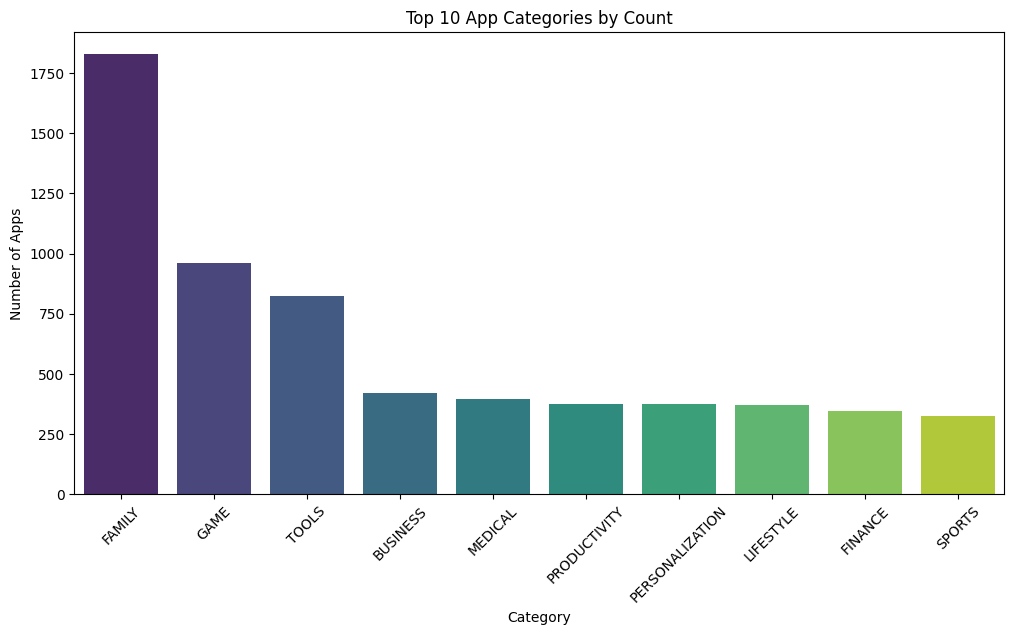

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 categories by app count
top_categories = data1['Category'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.title('Top 10 App Categories by Count')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.show()


<ipython-input-17-b703cb6c0674>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_category.index, y=avg_rating_by_category.values, palette='coolwarm')


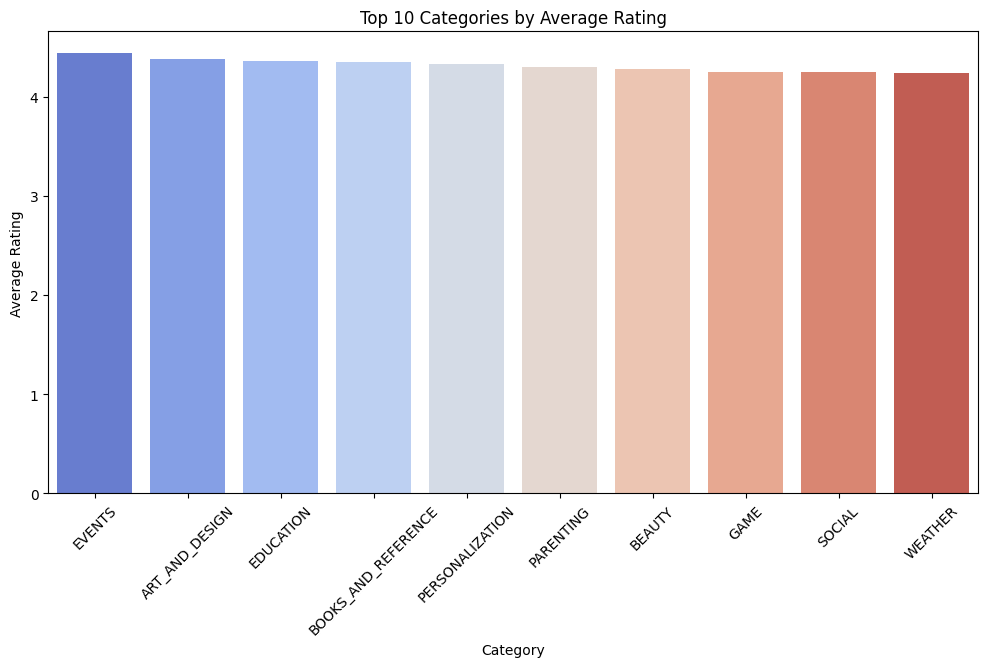

In [ ]:
# Average rating by category
avg_rating_by_category = data1.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_category.index, y=avg_rating_by_category.values, palette='coolwarm')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

<ipython-input-18-586e9aac80fb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=installs_by_category.index, y=installs_by_category.values, palette='magma')


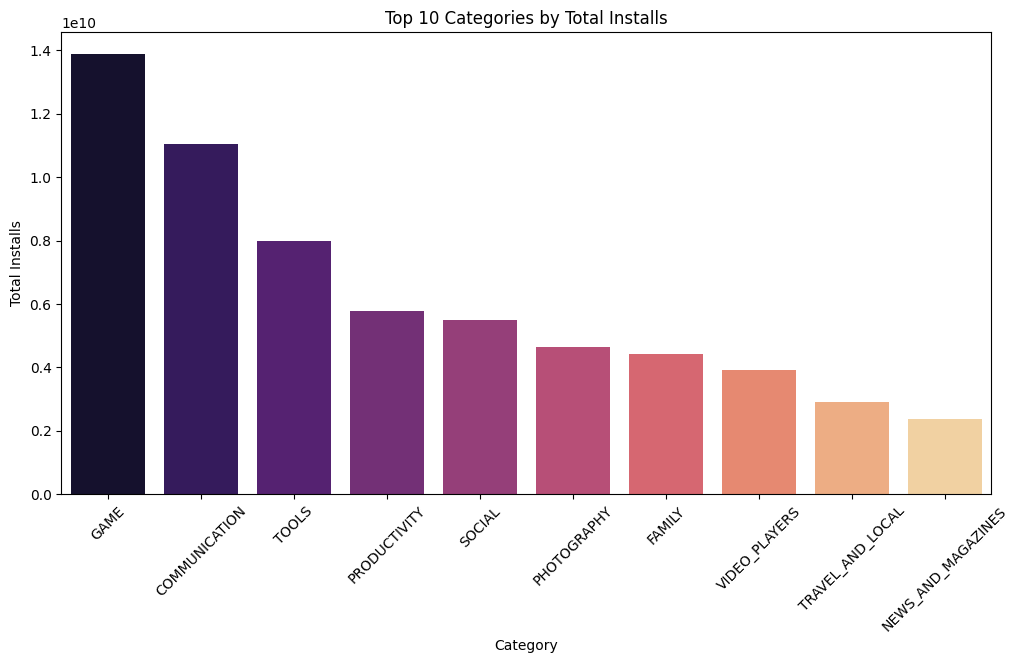

In [ ]:
# Total installs by category
installs_by_category = data1.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=installs_by_category.index, y=installs_by_category.values, palette='magma')
plt.title('Top 10 Categories by Total Installs')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=45)
plt.show()

<ipython-input-19-88695d8d9c9c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data2, x='Sentiment', palette='Set2')


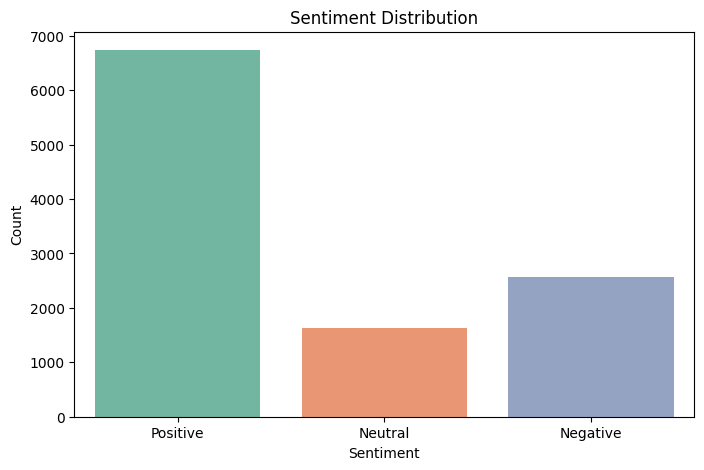

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data2, x='Sentiment', palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
# Average polarity and subjectivity by sentiment
avg_polarity_subjectivity = data2.groupby('Sentiment')[['Sentiment_Polarity', 'Sentiment_Subjectivity']].mean()

<ipython-input-21-59653d116a05>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_polarity_subjectivity.index, y=avg_polarity_subjectivity['Sentiment_Polarity'], palette='cool')


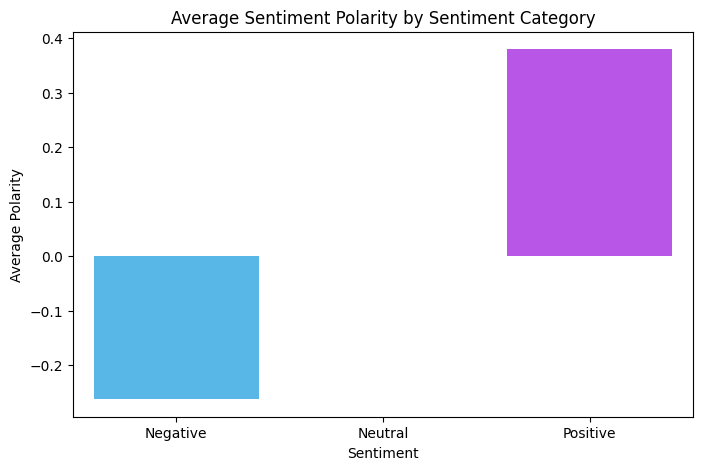

In [ ]:
# Plotting average polarity
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_polarity_subjectivity.index, y=avg_polarity_subjectivity['Sentiment_Polarity'], palette='cool')
plt.title('Average Sentiment Polarity by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Average Polarity')
plt.show()


<ipython-input-22-04f4610bee46>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_polarity_subjectivity.index, y=avg_polarity_subjectivity['Sentiment_Subjectivity'], palette='cool')


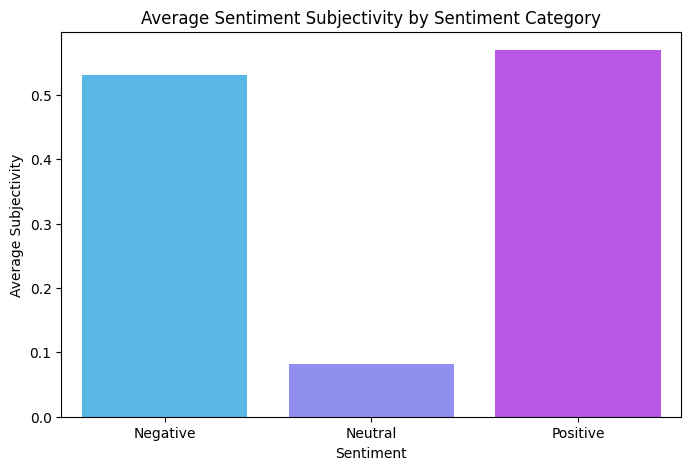

In [ ]:
# Plotting average subjectivity
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_polarity_subjectivity.index, y=avg_polarity_subjectivity['Sentiment_Subjectivity'], palette='cool')
plt.title('Average Sentiment Subjectivity by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Average Subjectivity')
plt.show()

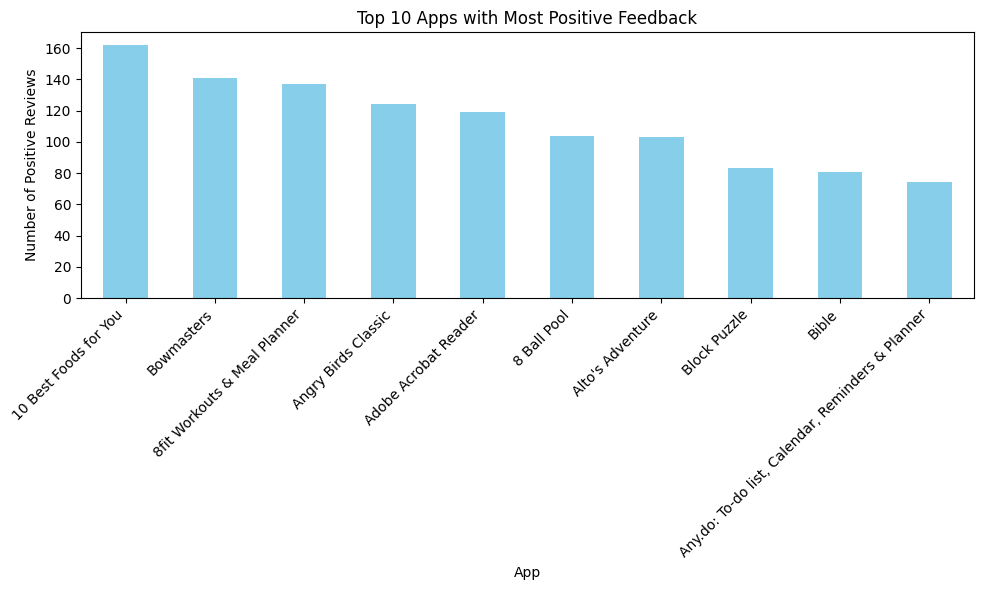

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming cleaned_data2 is already loaded as a DataFrame
# If not, load it like this:
# cleaned_data2 = pd.read_csv('your_cleaned_data_path.csv')

# Filter for positive reviews only
positive_reviews = data2[data2['Sentiment'] == 'Positive']

# Group by 'App' and count the number of positive reviews per app
top_positive_apps = positive_reviews['App'].value_counts().head(10)

# Plotting the top apps with the most positive feedback
plt.figure(figsize=(10, 6))
top_positive_apps.plot(kind='bar', color='skyblue')
plt.title('Top 10 Apps with Most Positive Feedback')
plt.xlabel('App')
plt.ylabel('Number of Positive Reviews')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()  # Adjusts plot to fit into the figure area
plt.show()


<ipython-input-25-034dae052bcd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_polarity_subjectivity.index, y=avg_polarity_subjectivity['Sentiment_Polarity'], palette='cool')
<ipython-input-25-034dae052bcd>:11: UserWarning: Glyph 25214 (\N{CJK UNIFIED IDEOGRAPH-627E}) missing from current font.
  plt.tight_layout()  # Adjusts plot to fit into the figure area
<ipython-input-25-034dae052bcd>:11: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from current font.
  plt.tight_layout()  # Adjusts plot to fit into the figure area
<ipython-input-25-034dae052bcd>:11: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  plt.tight_layout()  # Adjusts plot to fit into the figure area
<ipython-input-25-034dae052bcd>:11: UserWarning: Glyph 25171 (\N{CJK UNIFIED IDEOGRAPH-6253}) missing from c

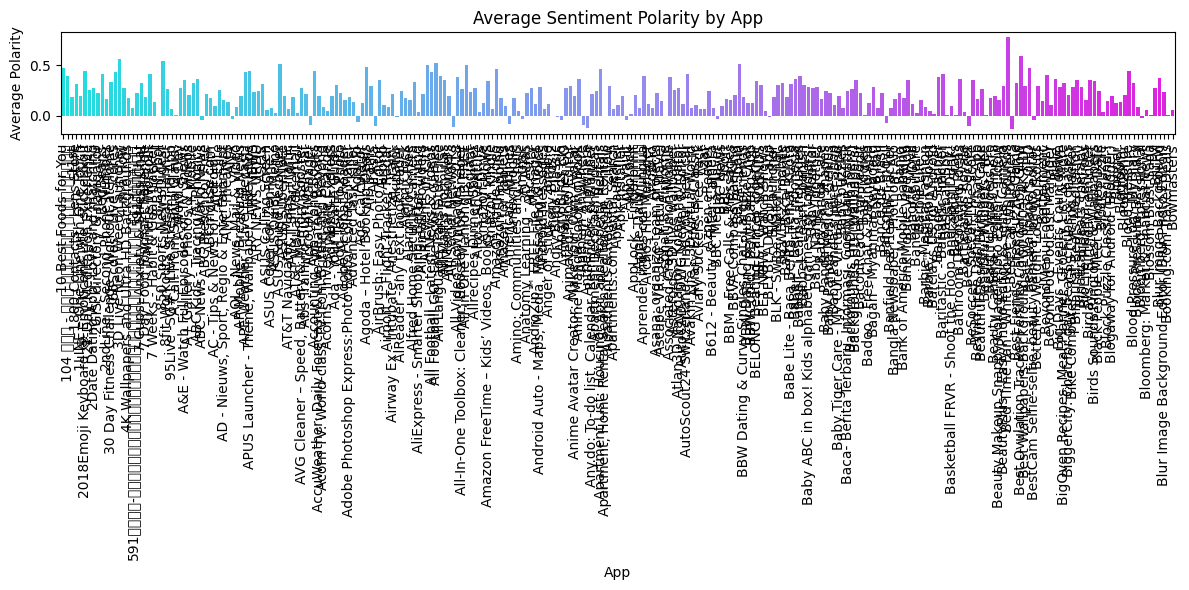

<ipython-input-25-034dae052bcd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_polarity_subjectivity.index, y=avg_polarity_subjectivity['Sentiment_Subjectivity'], palette='cool')
<ipython-input-25-034dae052bcd>:21: UserWarning: Glyph 25214 (\N{CJK UNIFIED IDEOGRAPH-627E}) missing from current font.
  plt.tight_layout()  # Adjusts plot to fit into the figure area
<ipython-input-25-034dae052bcd>:21: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from current font.
  plt.tight_layout()  # Adjusts plot to fit into the figure area
<ipython-input-25-034dae052bcd>:21: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  plt.tight_layout()  # Adjusts plot to fit into the figure area
<ipython-input-25-034dae052bcd>:21: UserWarning: Glyph 25171 (\N{CJK UNIFIED IDEOGRAPH-6253}) missing f

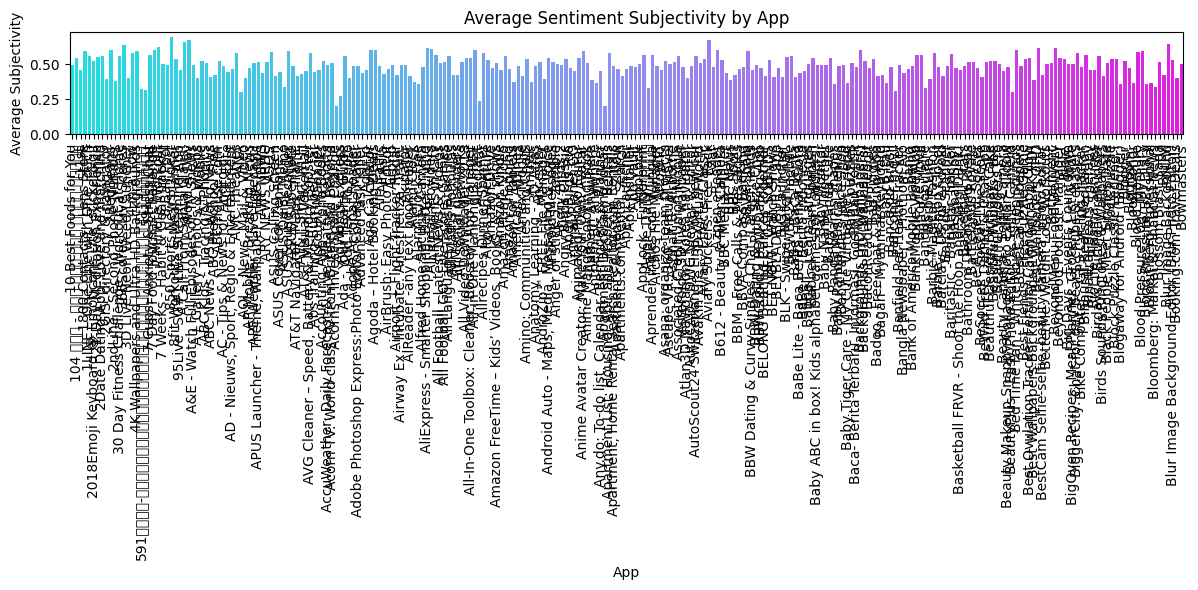

In [ ]:
# Average polarity and subjectivity by App
avg_polarity_subjectivity = data2.groupby('App')[['Sentiment_Polarity', 'Sentiment_Subjectivity']].mean()

# Plotting average polarity
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_polarity_subjectivity.index, y=avg_polarity_subjectivity['Sentiment_Polarity'], palette='cool')
plt.title('Average Sentiment Polarity by App')
plt.xlabel('App')
plt.ylabel('Average Polarity')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjusts plot to fit into the figure area
plt.show()

# Plotting average subjectivity
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_polarity_subjectivity.index, y=avg_polarity_subjectivity['Sentiment_Subjectivity'], palette='cool')
plt.title('Average Sentiment Subjectivity by App')
plt.xlabel('App')
plt.ylabel('Average Subjectivity')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjusts plot to fit into the figure area
plt.show()


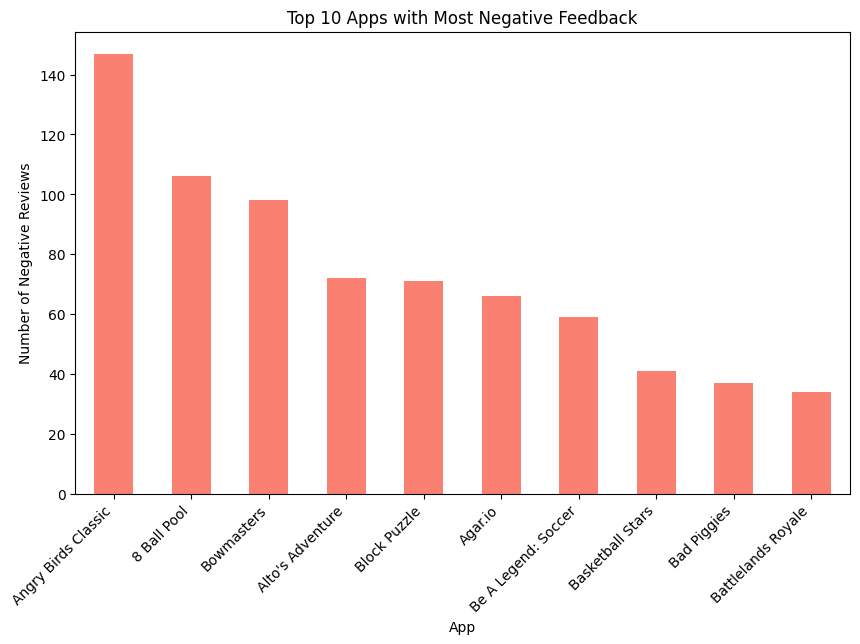

In [ ]:
# Filter for negative reviews only
negative_reviews = data2[data2['Sentiment'] == 'Negative']

# Group by 'App' and count the number of negative reviews per app
top_negative_apps = negative_reviews['App'].value_counts().head(10)

# Plotting the top apps with the most negative feedback
plt.figure(figsize=(10, 6))
top_negative_apps.plot(kind='bar', color='salmon')
plt.title('Top 10 Apps with Most Negative Feedback')
plt.xlabel('App')
plt.ylabel('Number of Negative Reviews')
plt.xticks(rotation=45, ha="right")
plt.show()


In [ ]:
# Assuming both data1 and data2 have a common column called 'App'
merged_data = pd.merge(data1[['App', 'Last Updated']], data2[['App', 'Sentiment', 'Sentiment_Polarity']], on='App', how='inner')

# Convert 'Last Updated' to datetime
merged_data['Last Updated'] = pd.to_datetime(merged_data['Last Updated'])


In [ ]:
# Create a new DataFrame with only relevant columns
sentiment_trend = merged_data.groupby(merged_data['Last Updated'].dt.to_period('M')).agg({'Sentiment': 'count', 'Sentiment_Polarity': 'mean'}).reset_index()


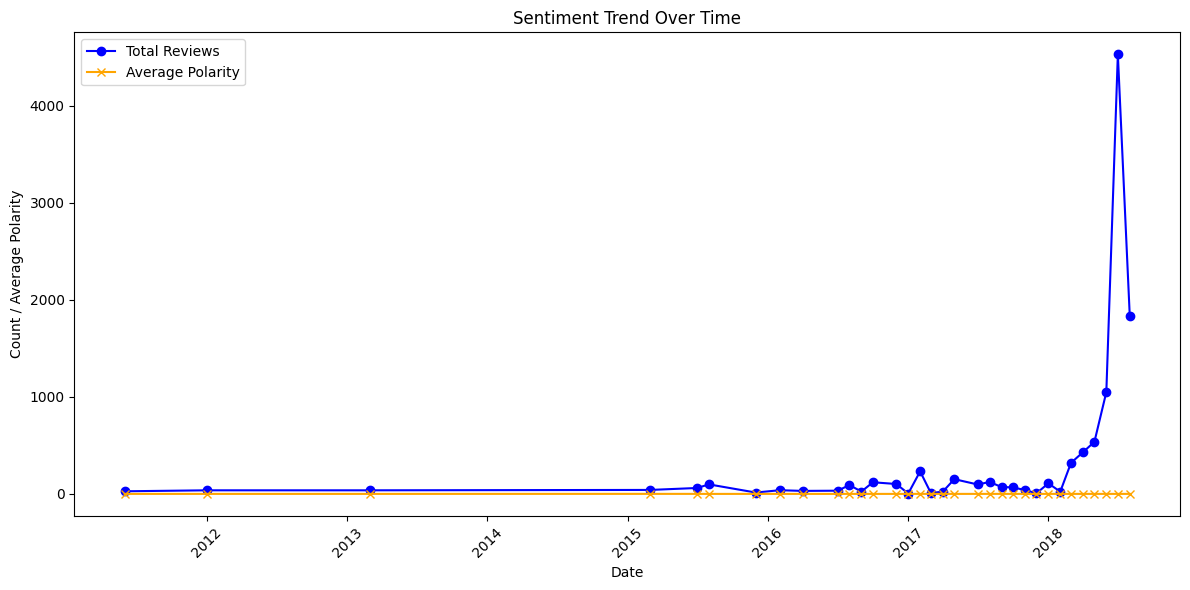

In [ ]:
# Plotting the sentiment trend
plt.figure(figsize=(12, 6))
plt.plot(sentiment_trend['Last Updated'].dt.to_timestamp(), sentiment_trend['Sentiment'], label='Total Reviews', color='blue', marker='o')
plt.plot(sentiment_trend['Last Updated'].dt.to_timestamp(), sentiment_trend['Sentiment_Polarity'], label='Average Polarity', color='orange', marker='x')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Count / Average Polarity')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


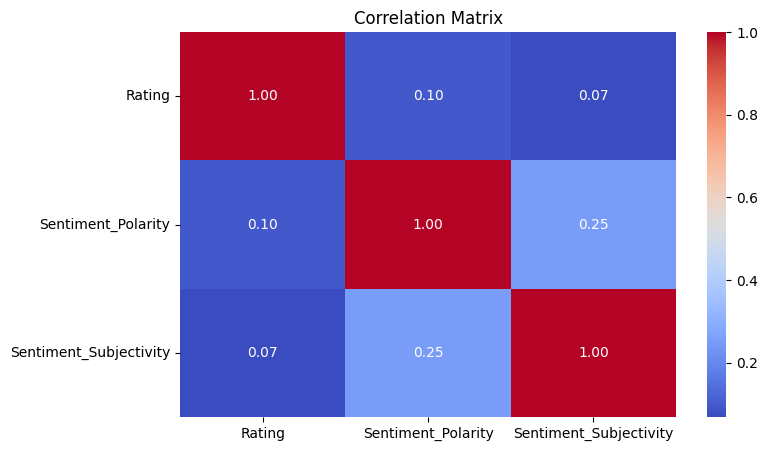

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data1 and data2 are already defined and contain the necessary columns
# Merge data1 and data2 on the 'App' column
merged_data = pd.merge(data1, data2, on='App', how='inner')

# Calculate the correlation matrix
correlation_matrix = merged_data[['Rating', 'Sentiment_Polarity', 'Sentiment_Subjectivity']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


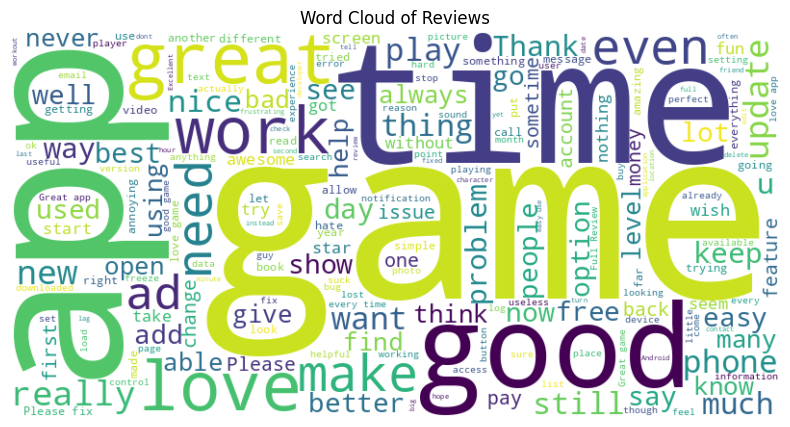

In [ ]:
from wordcloud import WordCloud

# Join all reviews into a single string
all_reviews = ' '.join(data2['Translated_Review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Reviews')
plt.show()


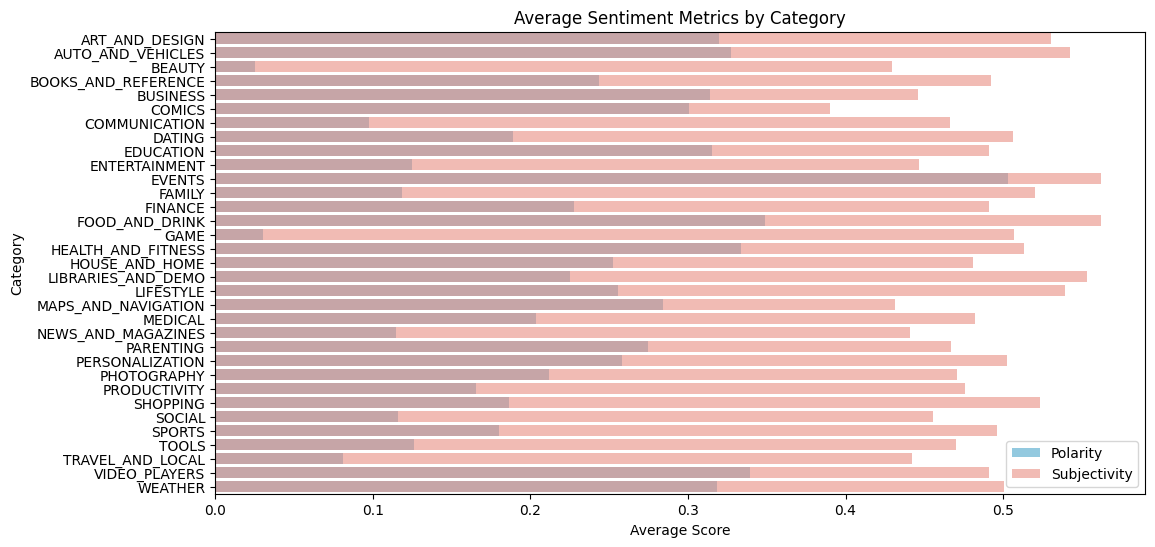

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data1 and data2 are already defined
# Merge data1 and data2 on the 'App' column
merged_data = pd.merge(data1, data2, on='App', how='inner')

# Calculate average sentiment metrics by category
category_sentiment = merged_data.groupby('Category').agg({
    'Sentiment_Polarity': 'mean',
    'Sentiment_Subjectivity': 'mean',
    'Rating': 'mean'
}).reset_index()

# Plotting the average sentiment metrics by category
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sentiment, x='Sentiment_Polarity', y='Category', color='skyblue', label='Polarity')
sns.barplot(data=category_sentiment, x='Sentiment_Subjectivity', y='Category', color='salmon', label='Subjectivity', alpha=0.6)
plt.title('Average Sentiment Metrics by Category')
plt.xlabel('Average Score')
plt.ylabel('Category')
plt.legend()
plt.show()
